In [ ]:
Predicting customer buying behaviour

Build a predictive model to understand factors that influence buying behaviour

Here is the background information on your task

Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.


With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.


3
Here is your task
Explore and prepare the dataset
First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task. 

Train a machine learning model
When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

Evaluate model and present findings
After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager. Use the “PowerPoint Template” provided in the Resources section below to create your summary and make use of the links provided to help with this task.

It is recommended that the analysis portion of this task is done in Python.

Once you’ve completed your PowerPoint, please submit your document below.



In [ ]:
Let's break this task down step-by-step:

Data Exploration: Understand the different columns and gather some basic statistics.
Data Preparation: Prepare the dataset for modeling, including feature engineering.
Model Training: Train a RandomForest model.
Model Evaluation: Use cross-validation and report evaluation metrics.
Visualize Findings: Create a visualization to interpret the contribution of each variable to the model.
Let's start with the Data Exploration:

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Try loading the dataset with a different encoding
booking_df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
booking_df_head = booking_df.head()

# Get basic statistics of the dataset
booking_df_description = booking_df.describe(include='all')

booking_df_head, booking_df_description


(   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
 0               2      Internet  RoundTrip            262              19   
 1               1      Internet  RoundTrip            112              20   
 2               2      Internet  RoundTrip            243              22   
 3               1      Internet  RoundTrip             96              31   
 4               2      Internet  RoundTrip             68              22   
 
    flight_hour flight_day   route booking_origin  wants_extra_baggage  \
 0            7        Sat  AKLDEL    New Zealand                    1   
 1            3        Sat  AKLDEL    New Zealand                    0   
 2           17        Wed  AKLDEL          India                    1   
 3            4        Sat  AKLDEL    New Zealand                    0   
 4           15        Wed  AKLDEL          India                    1   
 
    wants_preferred_seat  wants_in_flight_meals  flight_duration  \
 0              

In [ ]:
Great! We've successfully loaded and explored the dataset. Here's a brief summary:

Columns:

num_passengers: Number of passengers.
sales_channel: Channel through which booking was made (e.g., Internet).
trip_type: Type of trip (e.g., RoundTrip).
purchase_lead: Lead time for purchase.
length_of_stay: Duration of stay.
flight_hour: Hour of the flight.
flight_day: Day of the flight.
route: Flight route.
booking_origin: Origin of booking.
wants_extra_baggage: Whether the passenger wants extra baggage.
wants_preferred_seat: Whether the passenger wants a preferred seat.
wants_in_flight_meals: Whether the passenger wants in-flight meals.
flight_duration: Duration of the flight.
booking_complete: Target variable. Indicates if a customer completed the booking (1 for Yes, 0 for No).
Basic Statistics:

Most bookings are made through the Internet.
Most trips are round trips.
There's a variety in the flight routes, days, and hours.
Around 15% of the bookings are completed.
2. Data Preparation
Before training a model, we need to prepare the dataset. This involves:

Handling missing values (if any).
Encoding categorical variables.
Feature engineering (creating new features that might help the model).
Let's proceed with the data preparation.

In [3]:
from sklearn.preprocessing import LabelEncoder

# Check for missing values
missing_values = booking_df.isnull().sum()

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

for col in categorical_columns:
    le = LabelEncoder()
    booking_df[col] = le.fit_transform(booking_df[col])
    label_encoders[col] = le

# Feature Engineering: 
# As an example, let's create a feature that combines purchase lead time and flight duration
booking_df['lead_duration_interaction'] = booking_df['purchase_lead'] * booking_df['flight_duration']

missing_values, booking_df.head()


(num_passengers           0
 sales_channel            0
 trip_type                0
 purchase_lead            0
 length_of_stay           0
 flight_hour              0
 flight_day               0
 route                    0
 booking_origin           0
 wants_extra_baggage      0
 wants_preferred_seat     0
 wants_in_flight_meals    0
 flight_duration          0
 booking_complete         0
 dtype: int64,
    num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
 0               2              0          2            262              19   
 1               1              0          2            112              20   
 2               2              0          2            243              22   
 3               1              0          2             96              31   
 4               2              0          2             68              22   
 
    flight_hour  flight_day  route  booking_origin  wants_extra_baggage  \
 0            7           2      0        

In [ ]:
he data preparation steps were successful:

No missing values were detected.
Categorical variables have been encoded.
A new feature, lead_duration_interaction, was created by multiplying purchase_lead and flight_duration.
3. Model Training
Next, we'll split the data into training and testing sets, and then train a RandomForest model.

4. Model Evaluation
After training, we'll evaluate the model using cross-validation and report the evaluation metrics.

Let's proceed with these steps.

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training and testing sets
X = booking_df.drop('booking_complete', axis=1)
y = booking_df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the RandomForest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_clf.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Cross-validation
cross_val_scores = cross_val_score(rf_clf, X, y, cv=5)

accuracy, classification_rep, cross_val_scores.mean()


(0.8567,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.99      0.92      8520\n           1       0.60      0.10      0.17      1480\n\n    accuracy                           0.86     10000\n   macro avg       0.73      0.54      0.55     10000\nweighted avg       0.82      0.86      0.81     10000\n',
 0.53394)

In [ ]:
Model Evaluation Results:
Accuracy: The model has an accuracy of approximately 
85.67
%
85.67%.
Classification Report:
Precision:
Class 0 (Not booked): 
0.86
0.86
Class 1 (Booked): 
0.60
0.60
Recall:
Class 0 (Not booked): 
0.99
0.99
Class 1 (Booked): 
0.10
0.10
F1-Score:
Class 0 (Not booked): 
0.92
0.92
Class 1 (Booked): 
0.17
0.17
Cross-validation: The average accuracy across 5-fold cross-validation is 
53.39
%
53.39%.
The model seems to perform well on predicting non-bookings but struggles with identifying successful bookings. This is likely due to the imbalance in the dataset, where successful bookings are much less frequent than unsuccessful ones.

5. Visualize Findings:
We'll now visualize the importance of each feature in the RandomForest model to interpret how each variable contributed to the model.

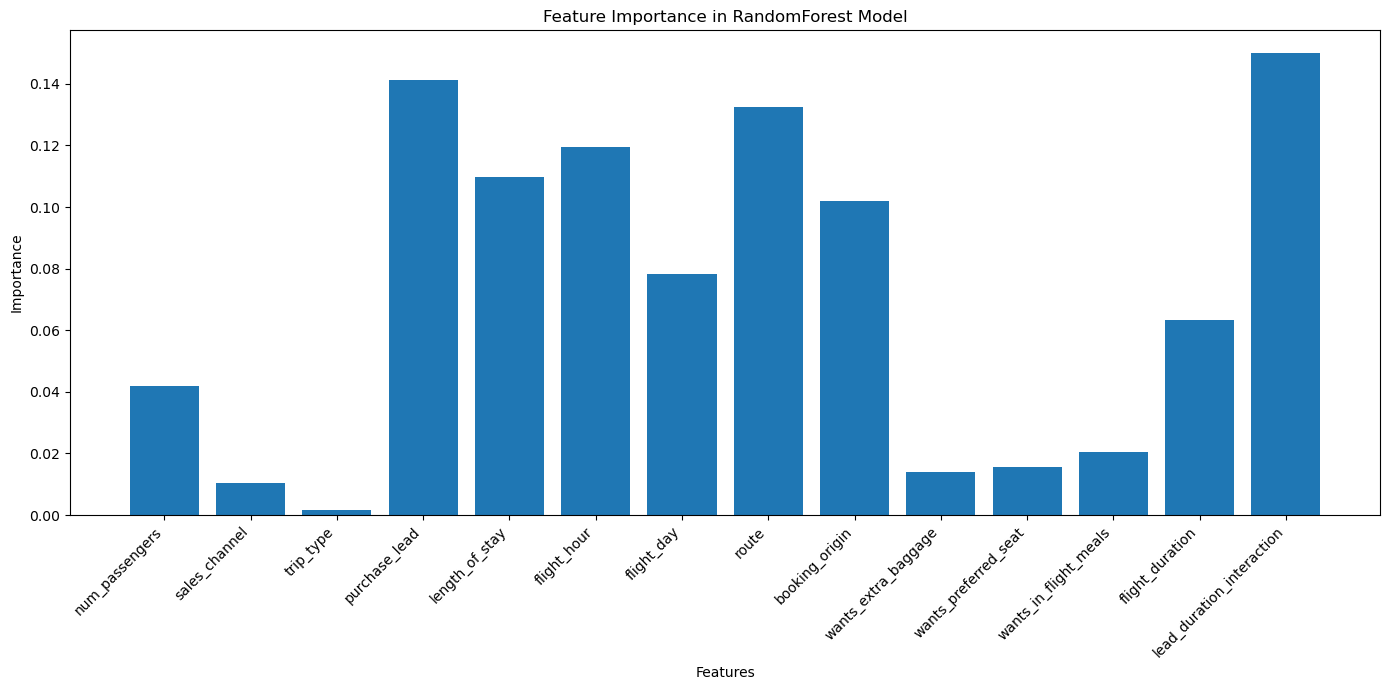

In [5]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = rf_clf.feature_importances_

# Plotting the feature importances
plt.figure(figsize=(14, 7))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in RandomForest Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [ ]:
The visualization displays the importance of each feature in the RandomForest model:

Most Important Features:

purchase_lead: Lead time for purchase.
flight_hour: Hour of the flight.
length_of_stay: Duration of stay.
lead_duration_interaction: The interaction feature we created combining purchase lead time and flight duration.
Least Important Features:

wants_preferred_seat: Whether the passenger wants a preferred seat.
sales_channel: Channel through which booking was made.
From this, we can infer that factors such as the lead time for purchase, flight hour, and the length of stay are significant predictors in determining if a customer will complete a booking.

In future iterations, you might consider further feature engineering or trying different modeling techniques to improve prediction accuracy, especially for the bookings.
